# Basics of Returns (수익률)

- 가격(Prices)의 수익률(Returns) 변환

- 수익률 계산 및 수익률 시퀀스를 복리화

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

## 1. Simple Returns (단순 수익률)

$t$ 시간에서 ${t+1}$ 시간까지의 Return은 다음과 같이 계산됩니다. 나중가격  / 이전가격 - 1

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$


주식 a 의 3일간의 가격 변화

In [44]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

주식 a의 일일 수익률

In [45]:
(prices_a[1:] - prices_a[:-1]) / prices_a[:-1]

array([ 0.02413793, -0.02244669])

In [46]:
returns = prices_a[1:] / prices_a[:-1] - 1
returns

array([ 0.02413793, -0.02244669])

이제 가격을 며칠 더 추가하고 두 번째 주식을 소개합니다. 이 두 주식을 "BLUE"와 "ORANGE"라고 부르고 Pandas DataFrame을 사용하여 다음과 같이 표시합니다.

In [47]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                                    "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

BLUE  ORANGE
0  8.70   10.66
1  8.91   11.08
2  8.71   10.71
3  8.43   11.59
4  8.73   12.11

- 일일 수익률 계산 
$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [48]:
prices.iloc[1:] / prices.iloc[:-1].values - 1

BLUE    ORANGE
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

위와 동일한 결과를  `.shift()` 메서드를 이용하여 쉽게 구할 수 있습니다.   

In [49]:
returns = prices / prices.shift(1) - 1
returns

BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

- 전날의 종가가 없기 때문에 첫날의 수익을 계산할 수 없다는 점에 유의 

- 일반적으로 가격에서 수익으로 이동할 때 하나의 데이터 포인트를 잃음

- DataFrame에는 한 행에서 다른 행으로의 백분율 변경을 계산하는 기본 제공 메서드가 있습니다. 이 방법을 사용하여 수익률을 위의 방법보다 더 쉽게 계산할 수 있습니다.

In [50]:
returns = prices.pct_change()
returns

BLUE    ORANGE
0       NaN       NaN
1  0.024138  0.039400
2 -0.022447 -0.033394
3 -0.032147  0.082166
4  0.035587  0.044866

### 수익률 평균, 표준편차
- 12 개월 가격

In [51]:
prices = pd.read_csv('data/sample_prices.csv')
prices

BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892

- 월별 수익률

In [52]:
returns = prices.pct_change()
returns

BLUE    ORANGE
0        NaN       NaN
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

- 평균 수익률

In [53]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

- 수익률 표준 편차

In [54]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

- 12 개월 수익률 변화 시각화  
- 평균 수익률은 같으나 변동성이 크게 다르므로, 평균 수익률 (average return)은 주식 평가의 좋은 지표가 아님.

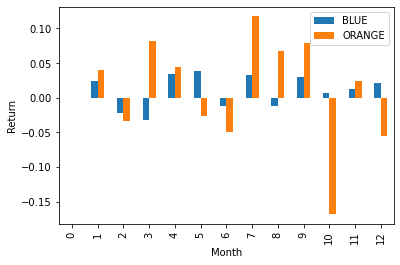

In [55]:
ax = returns.plot.bar()
ax.set_xlabel('Month')
ax.set_ylabel('Return')
None

## 2. Compounding Returns (복리 수익률)

- 이제 일련의 12개월 수익률이 있으므로 수익률이 `1+R` 형식이라고 부르는 성장률(Growth Rate)로 표현되는 한 개별 기간 수익률을 곱하여 복리 수익률을 산출할 수 있습니다.

- CAGR(Compound Annual Growth Rate, 연평균 성장률, 연복리 수익률) 계산 공식  

    방법 1. 매(일, 월)별 수익률로 계산
        - 복리 수익률은 각 수익률에 1을 더한 다음 모두 곱하기만 하면 됩니다. 결과는 1+R 형식이므로 1을 빼야 합니다.  
        
        
    방법 2.  시초 가격과 최종 가격, 투자 기간으로 계산
    
$$CAGR = \left(\frac{현재자산}{과거자산}\right)^{\frac{1}{투자기간연수}} - 1$$

$$CAGR = ( 1 + 누적수익률 ) ^ \frac{1}{투자기간연수}- 1$$



두 시리즈의 복리 수익률을 계산해 보겠습니다.

매월의 수익률

In [56]:
returns + 1

BLUE    ORANGE
0        NaN       NaN
1   1.023621  1.039662
2   0.978193  0.966362
3   0.968237  1.082232
4   1.034477  1.044544
5   1.037786  0.973619
6   0.988548  0.950813
7   1.032676  1.117008
8   0.987419  1.067353
9   1.029581  1.078249
10  1.006151  0.831739
11  1.012162  1.024041
12  1.021149  0.944377

방법 1로 복리 수익률 계산

In [57]:
((returns+1).prod()-1)

BLUE      0.123310
ORANGE    0.087167
dtype: float64

위 경우,  평균 수익률은 동일하나 복리 수익률은 차이가 많이 납니다.

방법 2로 복리 수익률 계산

In [58]:
(prices['BLUE'].values[-1]/prices['BLUE'].values[0]) - 1

0.1233103448275863

In [59]:
(prices['ORANGE'].values[-1]/prices['ORANGE'].values[0]) - 1

0.08716697936210127

두 방법의 결과가 동일함을 확인

## 3. Annualizing Returns (연간 수익률)

일정 기간 동안의 수익률을 연간으로 계산하려면 1년의 기간만큼 수익률을 복리화합니다. 

월별 수익 $R_m$을 연간으로 환산하는 공식은 다음과 같습니다.

$$ (1+R_m)^{12} - 1$$

분기별 수익 $R_q$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_q)^{4} - 1$$

마지막으로 일일 수익 $R_d$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_d)^{252} - 1$$

예를 들어, 월별 1%, 분기별 4% 및 일일 수익률 0.01%를 연간화하려면 다음을 수행합니다.

In [60]:
rm = 0.01  #월별 1%

(1+rm)**12 - 1  #월별 수익률을 연간으로 환산

0.12682503013196977

In [61]:
rq = 0.04  #분기별 수익률
(1+rq)**4 - 1   #분기별 수익률을 연간으로 환산

0.1698585600000002

### 주식 수익률 (Return) 계산

In [62]:
df = fdr.DataReader("AAPL", start="2022-06-02", end="2022-06-30")
df.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
df

Close
Date                  
2022-06-02  151.210007
2022-06-03  145.380005
2022-06-06  146.139999
2022-06-07  148.710007
2022-06-08  147.960007
2022-06-09  142.639999
2022-06-10  137.130005
2022-06-13  131.880005
2022-06-14  132.759995
2022-06-15  135.429993
2022-06-16  130.059998
2022-06-17  131.559998
2022-06-21  135.869995
2022-06-22  135.350006
2022-06-23  138.270004
2022-06-24  141.660004
2022-06-27  141.660004
2022-06-28  137.440002
2022-06-29  139.229996

### simple return 계산

In [63]:
df['Return'] = df['Close'].pct_change()
df

Close    Return
Date                            
2022-06-02  151.210007       NaN
2022-06-03  145.380005 -0.038556
2022-06-06  146.139999  0.005228
2022-06-07  148.710007  0.017586
2022-06-08  147.960007 -0.005043
2022-06-09  142.639999 -0.035956
2022-06-10  137.130005 -0.038629
2022-06-13  131.880005 -0.038285
2022-06-14  132.759995  0.006673
2022-06-15  135.429993  0.020111
2022-06-16  130.059998 -0.039651
2022-06-17  131.559998  0.011533
2022-06-21  135.869995  0.032761
2022-06-22  135.350006 -0.003827
2022-06-23  138.270004  0.021574
2022-06-24  141.660004  0.024517
2022-06-27  141.660004  0.000000
2022-06-28  137.440002 -0.029790
2022-06-29  139.229996  0.013024

### 누적 수익률 (Cumulative Return)
방법 1 : 매일(달)의 수익률로 계산  
누적 수익률 = (1+당일 수익률) * (전일자 누적 수익률)  
$$i_t = (1 + r_t) * i_{t-1}$$

방법 2: 처음, 마지막 가격으로 계산  
누적 수익률 = $\left( \frac{현재가격}{과거가격} \right) - 1$

- 누적 수익률은 단순 덧셈이 아닌 곱셉으로 계산  
 
ex) 10000원이었던 주식이 첫째 달에 10% 상승하고 둘째 달에 20% 상승하게 된다면 누적 수익률은 30%가 아닌, 32%

|기존|10,000원|0%|
|-----|----|----|
|첫째달|11,000원|10%상승|
|둘째달|13,200원|20%상승|
|누적수익률| |32%상승| 

$$(1+0.2)*(1+0.1)-1$$

방법 1 :  (1+당일 수익률) * (전일자 누적 수익률)

In [64]:
(1+0.2) * (1+0.1) - 1

0.32000000000000006

방법 2: (현재가격/과거가격) - 1

In [65]:
(13200 / 10000) - 1

0.32000000000000006

주식의 daily 누적 수익률

In [66]:
df['Cum Return'] = (1 + df['Return']).cumprod() - 1
df

Close    Return  Cum Return
Date                                        
2022-06-02  151.210007       NaN         NaN
2022-06-03  145.380005 -0.038556   -0.038556
2022-06-06  146.139999  0.005228   -0.033530
2022-06-07  148.710007  0.017586   -0.016533
2022-06-08  147.960007 -0.005043   -0.021493
2022-06-09  142.639999 -0.035956   -0.056676
2022-06-10  137.130005 -0.038629   -0.093116
2022-06-13  131.880005 -0.038285   -0.127835
2022-06-14  132.759995  0.006673   -0.122016
2022-06-15  135.429993  0.020111   -0.104358
2022-06-16  130.059998 -0.039651   -0.139872
2022-06-17  131.559998  0.011533   -0.129952
2022-06-21  135.869995  0.032761   -0.101448
2022-06-22  135.350006 -0.003827   -0.104887
2022-06-23  138.270004  0.021574   -0.085576
2022-06-24  141.660004  0.024517   -0.063157
2022-06-27  141.660004  0.000000   -0.063157
2022-06-28  137.440002 -0.029790   -0.091065
2022-06-29  139.229996  0.013024   -0.079228

In [67]:
df['Close'][-1] / df['Close'][0]  -1

-0.0792276333933375

## 5. Log Returns (로그 수익률)

$$Log 수익률 = log⁡(나중가격/이전가격)  = log(나중가격) – log(이전가격)$$

$$R_t = \log{(P_{t+1}/P_t)} = \log{P_{t+1}} - \log{P_t}$$

- 자산 가격의 변화 : 100 $\rightarrow$ 130 $\rightarrow$ 100

In [68]:
#simple return의 누적 수익률
(130 - 100) / 100 + (100 - 130) / 130

0.0692307692307692

In [69]:
#log return의 누적 수익률
(np.log(130) - np.log(100)) + (np.log(100) - np.log(130))

0.0

- 일별 로그 수익률

In [70]:
df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))
df

Close    Return  Cum Return  LogReturn
Date                                                   
2022-06-02  151.210007       NaN         NaN        NaN
2022-06-03  145.380005 -0.038556   -0.038556  -0.039319
2022-06-06  146.139999  0.005228   -0.033530   0.005214
2022-06-07  148.710007  0.017586   -0.016533   0.017433
2022-06-08  147.960007 -0.005043   -0.021493  -0.005056
2022-06-09  142.639999 -0.035956   -0.056676  -0.036618
2022-06-10  137.130005 -0.038629   -0.093116  -0.039395
2022-06-13  131.880005 -0.038285   -0.127835  -0.039037
2022-06-14  132.759995  0.006673   -0.122016   0.006650
2022-06-15  135.429993  0.020111   -0.104358   0.019912
2022-06-16  130.059998 -0.039651   -0.139872  -0.040459
2022-06-17  131.559998  0.011533   -0.129952   0.011467
2022-06-21  135.869995  0.032761   -0.101448   0.032236
2022-06-22  135.350006 -0.003827   -0.104887  -0.003834
2022-06-23  138.270004  0.021574   -0.085576   0.021344
2022-06-24  141.660004  0.024517   -0.063157   0.024222
2022-06-27  141.660004  0.000000   -0.063157   0.000000
2022-06-28  137.440002 -0.029790   -0.091065  -0.030242
2022-06-29  139.229996  0.013024   -0.079228   0.012940

### 누적 로그 수익률
- 로그 수익률은 cumsum() 사용  
- 단순히 daily return 을 더하면 기간 전체의 복리로 계산된 누적 수익률이 계산됨

In [71]:
df = df.round(6)

In [72]:
df['Cum LogReturn'] = df['LogReturn'].cumsum()
df

Close    Return  Cum Return  LogReturn  Cum LogReturn
Date                                                                  
2022-06-02  151.210007       NaN         NaN        NaN            NaN
2022-06-03  145.380005 -0.038556   -0.038556  -0.039319      -0.039319
2022-06-06  146.139999  0.005228   -0.033530   0.005214      -0.034105
2022-06-07  148.710007  0.017586   -0.016533   0.017433      -0.016672
2022-06-08  147.960007 -0.005043   -0.021493  -0.005056      -0.021728
2022-06-09  142.639999 -0.035956   -0.056676  -0.036618      -0.058346
2022-06-10  137.130005 -0.038629   -0.093116  -0.039395      -0.097741
2022-06-13  131.880005 -0.038285   -0.127835  -0.039037      -0.136778
2022-06-14  132.759995  0.006673   -0.122016   0.006650      -0.130128
2022-06-15  135.429993  0.020111   -0.104358   0.019912      -0.110216
2022-06-16  130.059998 -0.039651   -0.139872  -0.040459      -0.150675
2022-06-17  131.559998  0.011533   -0.129952   0.011467      -0.139208
2022-06-21  135.869995  0.032761   -0.101448   0.032236      -0.106972
2022-06-22  135.350006 -0.003827   -0.104887  -0.003834      -0.110806
2022-06-23  138.270004  0.021574   -0.085576   0.021344      -0.089462
2022-06-24  141.660004  0.024517   -0.063157   0.024222      -0.065240
2022-06-27  141.660004  0.000000   -0.063157   0.000000      -0.065240
2022-06-28  137.440002 -0.029790   -0.091065  -0.030242      -0.095482
2022-06-29  139.229996  0.013024   -0.079228   0.012940      -0.082542

- 누적 로그 수익률

$$1 + r = \log{\frac{p_t}{p_0}}$$ 

- 로그 수익률: 복리로 반영  
- 단순 수익률 : 단리로 반영

In [73]:
np.log(df['Close'][-1] / df['Close'][0])

-0.08254243222605803

In [74]:
(df['Close'][-1] - df['Close'][0]) / df['Close'][0]

-0.07922763339333747

## 연습 문제

1) 1,000,000 원을 수익률 10%로 10년, 20년, 30년 투자할 때 원금+수익 금액은 ?

In [75]:
print("{:,.0f}".format(1_000_000 * (1+0.1)**10))
print("{:,.0f}".format(1_000_000 * (1+0.1)**20))
print("{:,.0f}".format(1_000_000 * (1+0.1)**30))

2,593,742
6,727,500
17,449,402


2) 10,000 원을 10 년간 투자했는데 100,000 이 되었다. 누적 수익률과 CAGR 은  ?

In [76]:
# 누적 수익률
(100_000 / 10_000) - 1

9.0

In [77]:
# CAGR
(100_000 / 10_000) ** (1/10) - 1

0.2589254117941673

3) 애플 주식이 100불에서 10년 뒤 300 불이 되었다면 누적수익률과 CAGR 은 ?

In [78]:
# 누적 수익률
(300 / 100) - 1 

2.0

In [79]:
# CAGR
(300 / 100) ** (1/10) - 1

0.11612317403390437

## 72의 법칙
원금이 2 배가 되는데 걸리는 시간 = 72/CAGR  

ex) 10_000 원을 CAGR 10% 로 운용하면 72/10 = 7.2 년 후 원금이 2 배가 된다.

In [80]:
years = 72/10
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,743원 늘리는데
7.2 년 소요


CAGR 20% 인 경우 

In [81]:
years = 72/20
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,365원 늘리는데
3.6 년 소요


CAGR 30% 인 경우 

In [82]:
years = 72/30
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,242원 늘리는데
2.4 년 소요
